In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
df = pd.read_csv("sample_data/homeprices.csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


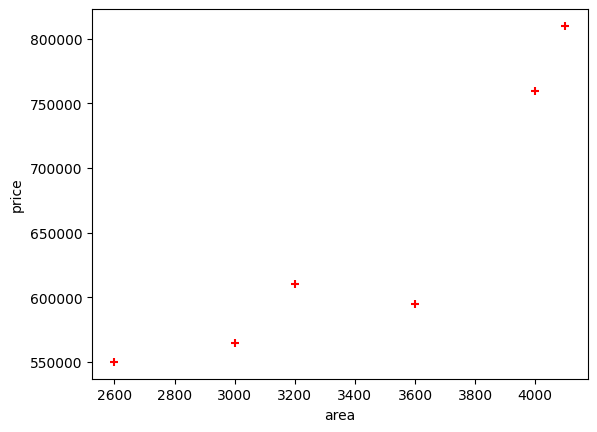

In [6]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='+')

In [7]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [8]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628813.88621022])

In [9]:
reg.coef_

array([167.30954677])

In [10]:
reg.intercept_

76692.38187078107

In [ ]:
d = pd.read_csv("sample_data/areas.csv")
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [ ]:
p = reg.predict(d)

In [ ]:
d['prices'] = p
d.to_csv("prediction.csv", index=False)

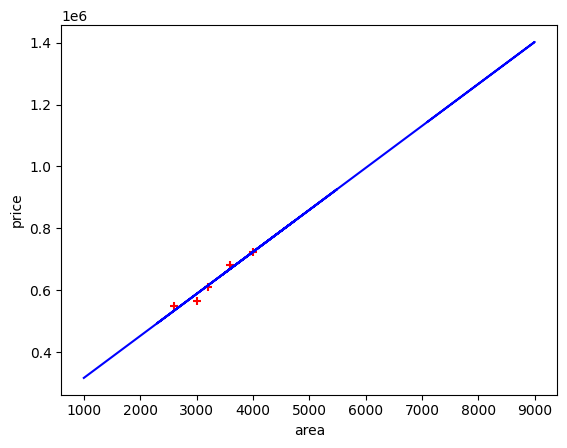

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(d.area, d.prices, color='blue')

In [ ]:
canada_df = pd.read_csv("sample_data/canada_per_capita_income.csv")
canada_df['per capita income'] = canada_df['per capita income (US$)']
canada_df = canada_df.drop('per capita income (US$)', axis = 1)
canada_df.head()

,year,per capita income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(canada_df[['year']], canada_df['per capita income'])

LinearRegression()

In [ ]:
reg.predict([[2020]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

Saving mmodels in a file using pickle and joblib

In [1]:
import pickle

In [13]:
with open('model_pickle','wb') as f:
  pickle.dump(reg, f)

In [14]:
with open('model_pickle', 'rb') as f:
  reg = pickle.load(f)

In [16]:
reg.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([913240.11571842])

In [22]:
import joblib
joblib.dump(reg, 'model_joblib')
reg = joblib.load('model_joblib')
reg.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([913240.11571842])